In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use("ggplot")
np.random.seed(1)
%matplotlib inline

In [2]:
def gen_data(N):
    x = np.random.normal(size=(N, 3))
    x[:, 2] = 1
    x[:N//2, 0] -=5
    x[N//2:, 0] +=5
    y = np.concatenate([np.ones(N//2), -np.ones(N//2)])
    
    x[:3, 1] -= 5
    y[:3] = -1
    x[-3:, 1] += 5
    y[-3:] = 1
    
    return x, y

In [3]:
class LinearSVM:
    
    def __init__(self, x, y, epsilon = 0.01, _lambda = 0.1):
        self.w = np.ones(x.shape[1])[:, None]
        self.train_x = x
        self.y = y
        self._lambda = _lambda
        self.epsilon = epsilon
        
    def train(self, it = 100):
        for i in tqdm(range(it)):
            self.update()
        return self.w
        
    def update(self):
        x = self.train_x
        y = self.y
        condition = 1 - np.dot(x, self.w) * y[:, None] > 0
        delta = np.sum(condition * (- y[:, None] * x), axis=0)[:, None] + self._lambda * self.w
        self.w -= self.epsilon * delta
    
    def predict(self, x):
        return - (w[0] * x + w[2]) / w[1]
    
    def get_w(self):
        return np.dot(self.theta, self.train_x)

100%|██████████| 10000/10000 [00:00<00:00, 28686.08it/s]


array([[-4.16730245],
       [ 5.85847236],
       [-0.33343182]])

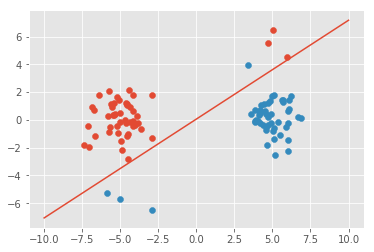

In [5]:
#実行
x, y = gen_data(100)
model = LinearSVM(x, y, epsilon = 0.1, _lambda=1.0)
w = model.train(10**4)
plt.plot([-10,10], model.predict([-10, 10]))
plt.scatter(x[:, 0][y==1], x[:, 1][y==1])
plt.scatter(x[:, 0][y==-1], x[:, 1][y==-1])
w